[Reference](https://towardsdatascience.com/your-everyday-cheatsheet-for-pythons-matplotlib-c03345ca390d)

In [1]:
import numpy as np  
import pandas as pd
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                   sheet_name='Canada by Citizenship',
                   skiprows=range(20),
                   skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [2]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [3]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [4]:
df['Total'] = df.sum(axis=1)

In [5]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [6]:
df = df.set_index('Country')

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [9]:
mpl.style.use(['ggplot'])

# Line plot

In [10]:
years = list(map(int, range(1980, 2014)))

In [11]:
df.loc['Switzerland', years]

1980    806
1981    811
1982    634
1983    370
1984    326
1985    314
1986    294
1987    565
1988    508
1989    523
1990    505
1991    602
1992    666
1993    728
1994    475
1995    687
1996    823
1997    666
1998    510
1999    536
2000    471
2001    383
2002    276
2003    346
2004    337
2005    270
2006    258
2007    308
2008    357
2009    328
2010    285
2011    266
2012    243
2013    201
Name: Switzerland, dtype: object

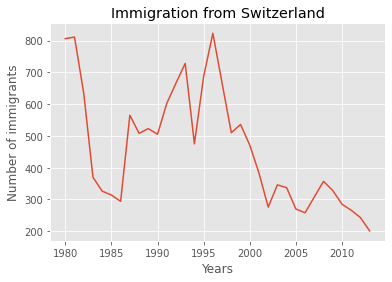

In [12]:
df.loc['Switzerland', years].plot()
plt.title('Immigration from Switzerland')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

In [13]:
ind_pak_ban = df.loc[['India', 'Pakistan', 'Bangladesh'], years]
ind_pak_ban.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Bangladesh,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789


In [14]:
ind_pak_ban.T

Country,India,Pakistan,Bangladesh
1980,8880,978,83
1981,8670,972,84
1982,8147,1201,86
1983,7338,900,81
1984,5704,668,98
1985,4211,514,92
1986,7150,691,486
1987,10189,1072,503
1988,11522,1334,476
1989,10343,2261,387


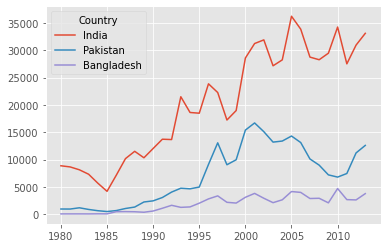

In [15]:
ind_pak_ban.T.plot()

# Pie Plot

In [16]:
cont = df.groupby('Continent', axis=0).sum()

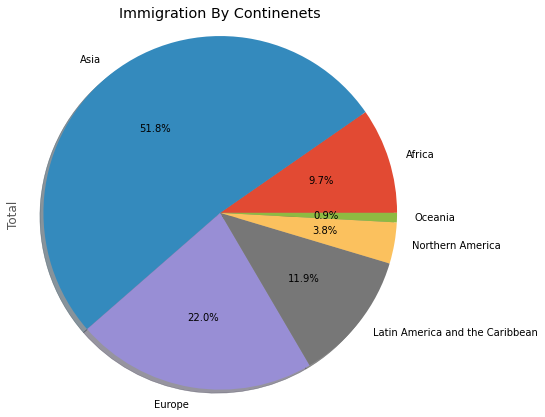

In [17]:
cont['Total'].plot(kind='pie', figsize=(7,7),
                  autopct='%1.1f%%',
                  shadow=True)
plt.title('Immigration By Continenets')
plt.axis('equal')
plt.show()

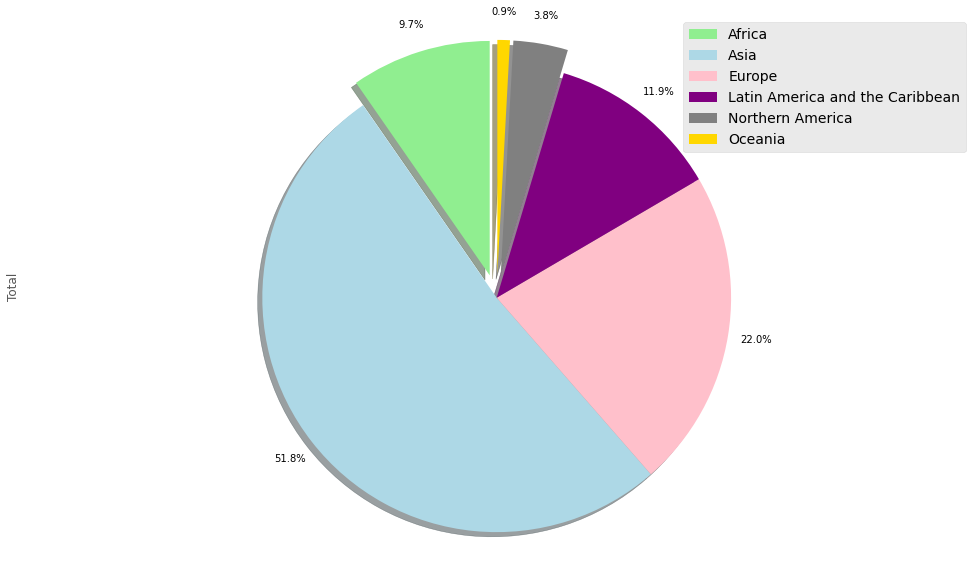

In [19]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'gold']
explode=[0.1, 0, 0, 0, 0.1, 0.1]
cont['Total'].plot(kind='pie', figsize=(17, 10),
                  autopct = '%1.1f%%', startangle=90,
                  shadow=True, labels=None, pctdistance=1.12, colors=colors, explode = explode)
plt.axis('equal')
plt.legend(labels=cont.index, loc='upper right', fontsize=14)
plt.show()

# Box plot

In [20]:
china = df.loc[['China'], years].T

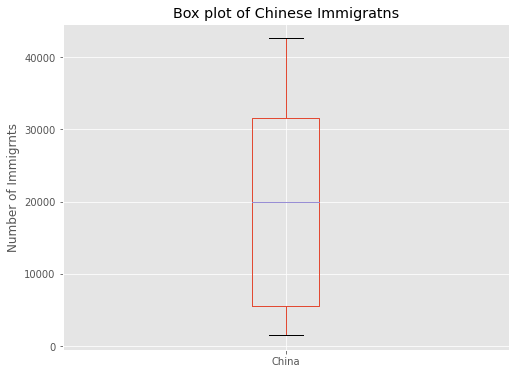

In [21]:
china.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Chinese Immigratns')
plt.ylabel('Number of Immigrnts')
plt.show()

Text(0, 0.5, 'Number of Immigrants')

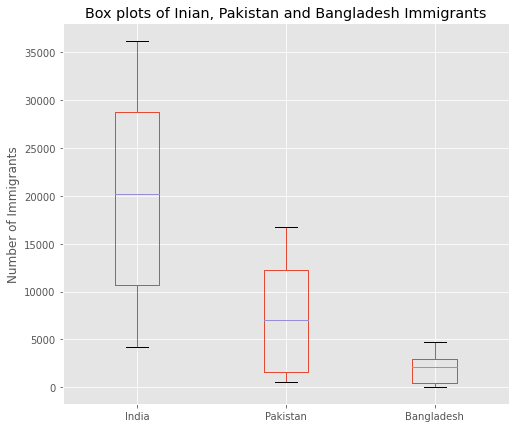

In [22]:
ind_pak_ban.T.plot(kind='box', figsize=(8, 7))
plt.title('Box plots of Inian, Pakistan and Bangladesh Immigrants')
plt.ylabel('Number of Immigrants')

# Scatter Plot

In [32]:
totalPerYear = pd.DataFrame(df[years].sum(axis=0))
totalPerYear.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [33]:
totalPerYear.index = map(int, totalPerYear.index)
totalPerYear.reset_index(inplace=True)
totalPerYear.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [37]:
totalPerYear.rename(columns={'index':'year', 0:'total'}, inplace=True)

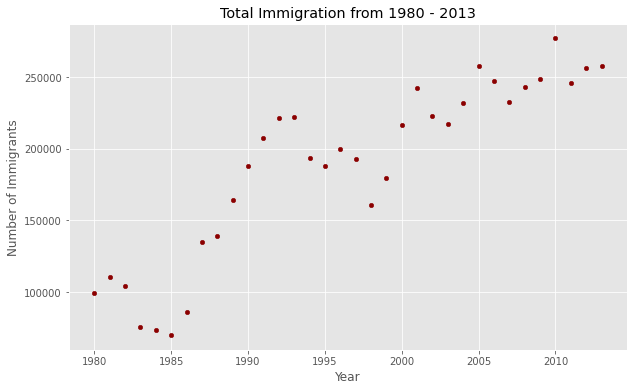

In [38]:
totalPerYear.plot(kind='scatter', x = 'year', y='total', figsize=(10, 6), color='darkred')
plt.title('Total Immigration from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

# Area Plot

In [39]:
top = df.loc[['India', 'China', 'Pakistan', 'France'], years]
top = top.T

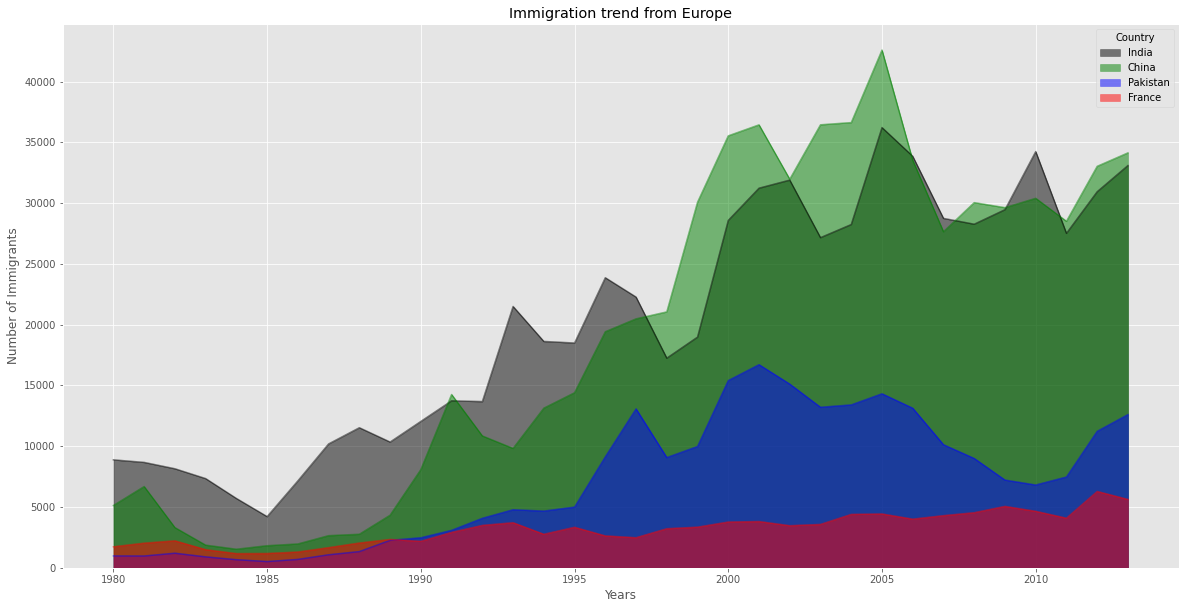

In [42]:
colors = ['black', 'green', 'blue', 'red']
top.plot(kind='area', stacked=False,
        figsize=(20, 10), color=colors)
plt.title('Immigration trend from Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

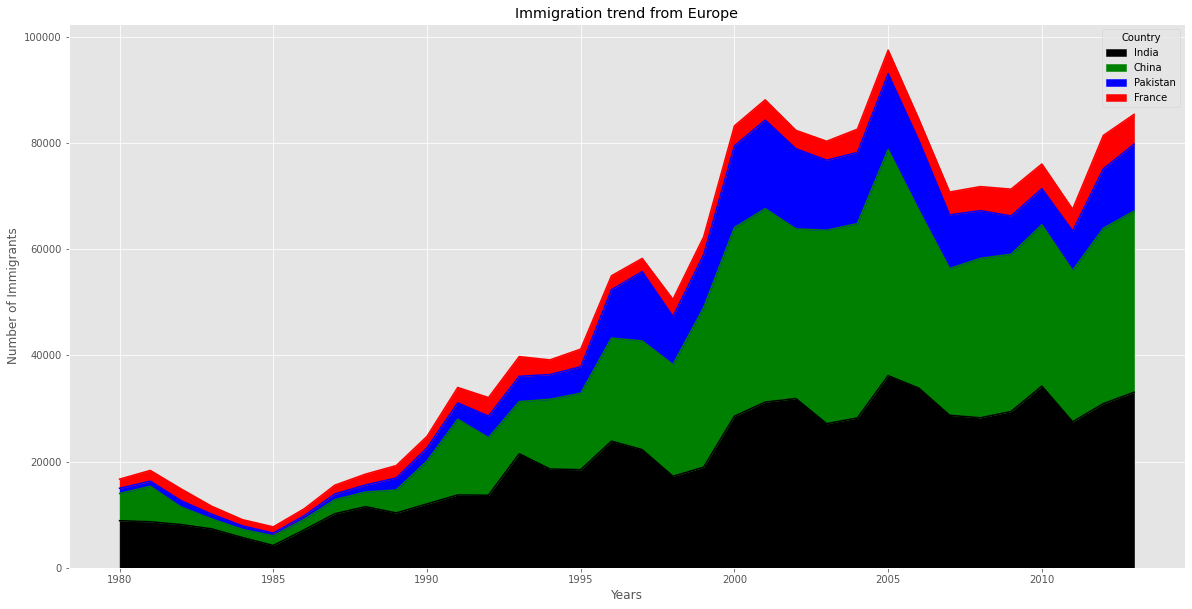

In [43]:
colors = ['black', 'green', 'blue', 'red']
top.plot(kind='area', stacked=True,
        figsize=(20, 10), color=colors)
plt.title('Immigration trend from Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

# Histogram

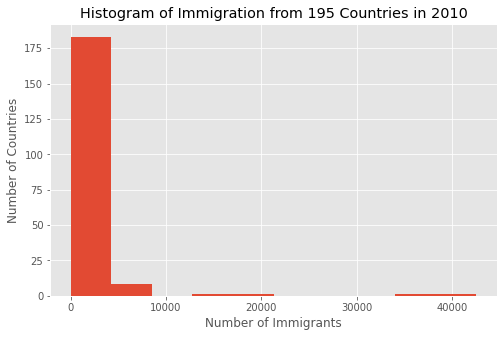

In [44]:
df[2005].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2010') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.show()

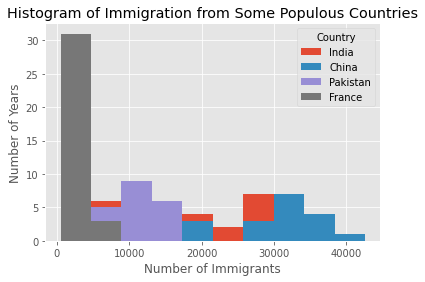

In [45]:
top.plot.hist()
plt.title('Histogram of Immigration from Some Populous Countries')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

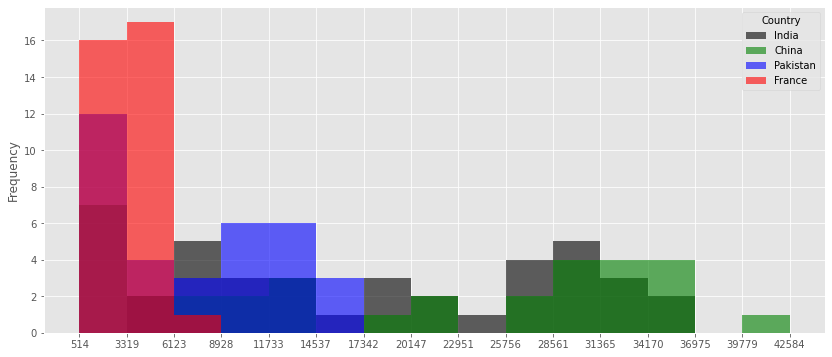

In [46]:
count, bin_edges = np.histogram(top, 15)
top.plot(kind = 'hist', figsize=(14, 6), bins=15, alpha=0.6, 
        xticks=bin_edges, color=colors)

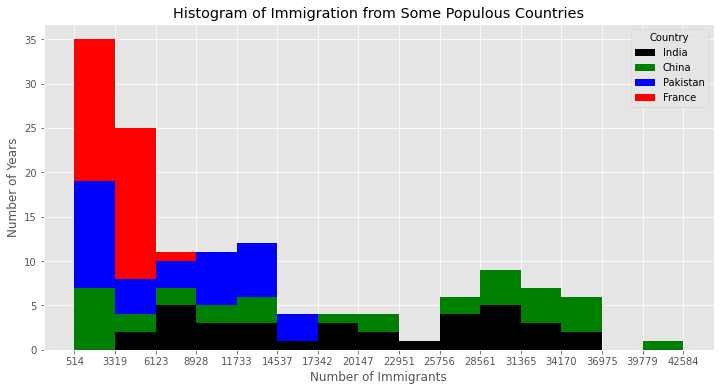

In [47]:
top.plot(kind='hist',
          figsize=(12, 6), 
          bins=15,
          xticks=bin_edges,
          color=colors,
          stacked=True,
         )
plt.title('Histogram of Immigration from Some Populous Countries')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

# Bar Plot

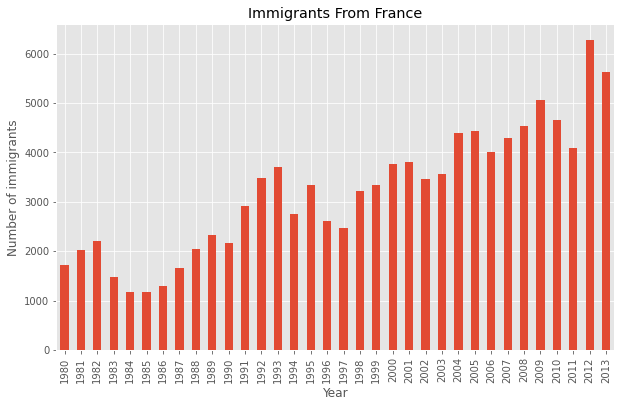

In [48]:
france = df.loc['France', years]
france.plot(kind='bar', figsize = (10, 6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Immigrants From France')
plt.show()

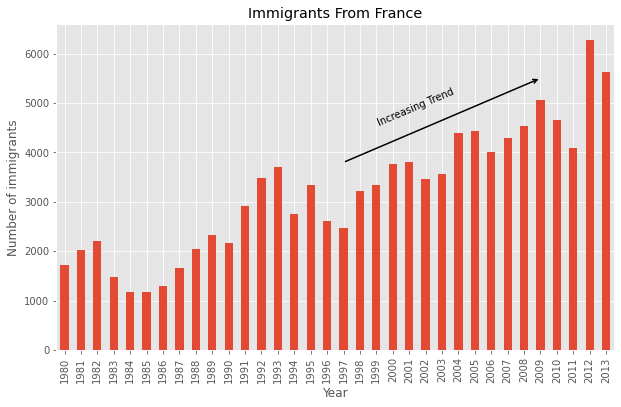

In [50]:
france.plot(kind='bar', figsize = (10, 6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Immigrants From France')
plt.annotate('Increasing Trend',
            xy = (19, 4500),
            rotation= 23,
            va = 'bottom',
            ha = 'left')
plt.annotate('',
            xy=(29, 5500),
            xytext=(17, 3800),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=1.5))
plt.show()

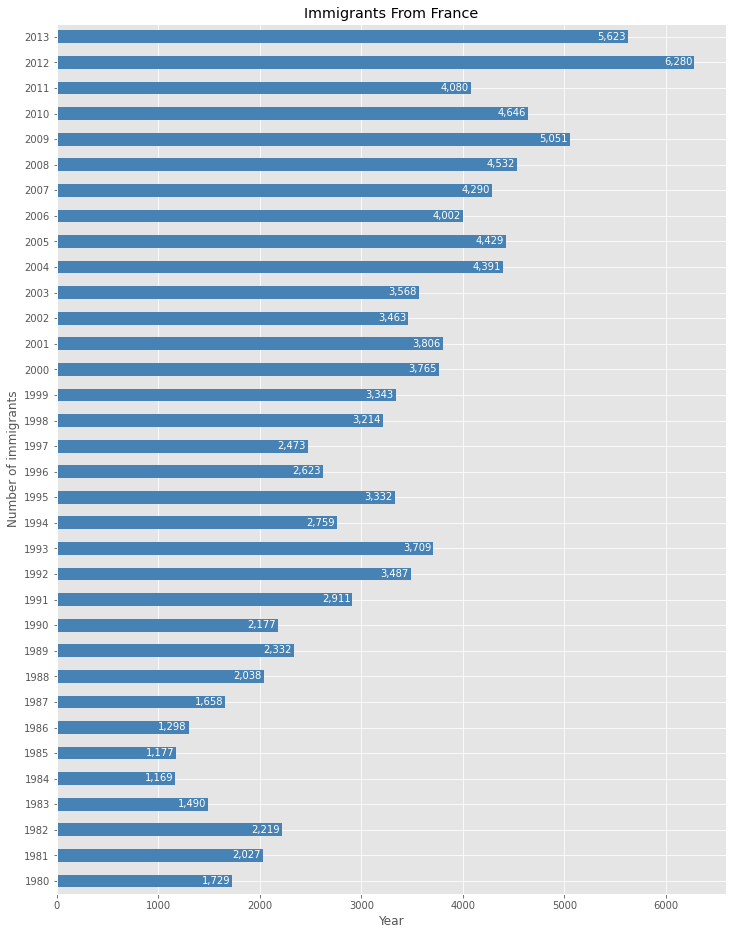

In [52]:
france.plot(kind='barh', figsize=(12, 16), color='steelblue')
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Immigrants From France') # add title to the plot
for index, value in enumerate(france):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-300, index-0.1), color='white')
    
plt.show()